# Chemical Equilibrium IV 

This lecture covers the next few equilibrium example problems.  Specifically, this example extends consideration to the impacts of changing temperature and pressure during ammonia synthesis.

```{caution}
This Notebook uses Python for solving algebraic equations. Before proceeding, it is useful to have also reviewed [Notebook 02](https://jqbond.github.io/CEN587/Notebooks/587-N02.html), which coves Jupyter and Python basics and [Notebook 03](https://jqbond.github.io/CEN587/Notebooks/587-N03.html), which covers numerical solution of algebraic equations. Typically, these two Notebooks are covered as Recitation exercises in parallel to lecture content. They are adequate to build working competency with Python and numerical methods for solving algebraic equations, and we always cover them before solving equilibrium problems.

If you are interested in a more in depth explanation of Python skills required here, please review [Supplement 01 - The Basics](https://jqbond.github.io/CEN587/Supplements/587-S01.html), [Supplement 02 - Data Structures](https://jqbond.github.io/CEN587/Supplements/587-S02.html), [Supplement 03 - Arrays and Matrices](https://jqbond.github.io/CEN587/Supplements/587-S03.html), [Supplement 09 - Root Finding for Univariate Functions](https://jqbond.github.io/CEN587/Supplements/587-S09.html), and [Supplement 12 - Root Finding for Systems of (Multivariate) Equations](https://jqbond.github.io/CEN587/Supplements/587-S12.html).
```

In [1]:
import numpy as np
import scipy.optimize as opt 
import matplotlib.pyplot as plt

## A More Realistic View of Ammonia Synthesis

Consider the gas-phase reaction of molecular nitrogen with molecular hydrogen to produce ammonia:

$$N_2 (g) + 3H_2 (g) \leftrightharpoons 2N\!H_3 (g)$$

We will again carry it out in a batch reactor at 1 bar, and we will start with 1 mole of $N_2$ and 3 moles of $H_2$. In [Notebook 07](https://jqbond.github.io/CEN587/Lectures/587-N07.html), we considered this exact system at 298K and 1 bar. We concluded that this reaction is extremely favorable at 298K and 1 bar, and we would expect an equilibrium conversion of N$_2$ of approximately 97%. Unfortunately, N$_2$ bond dissociation is incredibly difficult! Despite very favorable ***thermodynamics*** at 298K (how far can the reaction go?), $N_2$ and $H_2$ will react very, very slowly to form $N\!H_3$ at these conditions (how fast does the reaction get to where it is going?), so it is ***kinetically limited*** and effectively impossible to run this reaction at 298K. Essentially, it doesn't matter that it is ***possible*** to achieve 97% conversion of $N_2$ at 298K and 1 bar because we would ***never*** be able to achieve industrially relevant rates of ammonia synthesis at 298K!

```{tip}
The rate of a reaction controls how long we have to wait for products to form.  This impacts the length of batch reaction times, and it also impacts the size of flow reactors. In general, to achieve an identical conversion level, slow reactions will require larger reactors than fast reactions. This makes slow reactions more capital intensive processes.
```

### How Does Temperature Affect Chemical Equilibrium?

More realistically, ammonia synthesis as we've written it would probably need to be carried out at much higher temperatures to accomplish $N_2$ dissociation at an appreciable rate.  Let's say that we have to run ammonia synthesis at 873K to achieve an industrially relevant reaction rate. We will still perform the reaction at 1 bar in a batch reactor, and we will start the process by adding a 3:1 molar ratio of $H_2$:$N_2$ to the reactor. Without doing any calculations, at 873K and 1 bar, do you expect the equilibrium conversion of $N_2$ to increase or decrease compared to the 97% equilibrium conversion that we calculated at 298K and 1 bar?

```{important}
Exothermic reactions become less favorable as the temperature increases.  So I would expect a lower equilibrium conversion than 97% at 873K. How low? We can't say for sure without a detailed analysis and a bit of number crunching...this is the topic of Example 01 below 
```

## Example Problem 01

What is the equilibrium conversion of $N_2$ during ammonia synthesis at 873K, 1 bar, and starting with a 3:1 ratio of $H_2$:$N_2$? 

### Solution to Example Problem 01

We start by recalling the equation below, which relates the standard state change in Gibbs free energy (i.e., ***reaction thermodynamics***) to the equilibrium composition of the reacting system.

$$\exp\left(\frac{-\Delta G^\circ}{RT}\right) = K = \prod_{j = 1}^{N_S}a_j^{\nu_j}$$

#### Thermodynamic data and K

We will start with the left side of the equation. Assuming that we can solve it, it allows us to calculate a numerical value of the equilibrium constant from thermodynamic data. 

$$K = \exp\left(\frac{-\Delta G^\circ}{RT}\right)$$

To find $K$, we have to calculate the standard state Gibbs Free Energy of reaction, $\Delta G^\circ$.  For gas phase reactions like this one, the standard state is pure species at 1 bar and the reaction temperature.  For this example problem, we've ***increased*** the reaction temperature to 873K, so we need to calculate the Gibbs free energy change at 1 bar and 873K. Previously, we only had data at 298K, but we can correct for temperature effects using heat capacities.  They are included for each species in the table below.

|Species      | ${H_j}^\circ (\mathrm{kJ \ mol^{-1}})$| ${S_j}^\circ (\mathrm{J \ mol^{-1} \ K^{-1}})$ | ${C_{p_j}}^\circ (\mathrm{J \ mol^{-1} \ K^{-1}})$|
|-------------|:-------------------------------------:|:----------------------------------------------:|:-------------------------------------------------:|
| $N_2$ (g)   | 0                                     |191.60                                          |29.12                                              | 
| $H_2$ (g)   | 0                                     |130.68                                          |28.84                                              | 
| $N\!H_3$ (g)| -45.9                                 |192.77                                          |35.64                                              |

Now, we can us the data at $T_0 = 298K$ and the various heat capacities to calculate the enthalpy of each species at 873K using the following equation:

$$H_j = H_{j,0} + \int_{T_0}^{T} C_{p_j} dT$$

For heat capacities that are not a function of temperature (here, we have constant heat capacities), we can solve the integral and the equation simplifies to:

$$H_j = H_{j,0} + C_{p_j}(T - T_0)$$

Similarly, we can calculate entropies at a temperature other than $T_0 = 298K$ using the following equation:

$$S_j = S_{j,0} + \int_{T_0}^{T} \frac{C_{p_j}}{T} dT$$

For constant heat capacities like we have in this problem, we can again solve the integral giving:

$$S_j = S_{j,0} + C_{p_j}\ln\left(\frac{T}{T_0}\right)$$

In the cell below, we calculate enthalpies and entropies at 873K based on our data at 298K and the heat capacities we have available. Just to keep the notation simple, I'll use $N$ = $N_2$, $H = H_2$, and $A$ = $N\!H_3$. We also calculate the Gibbs Free Energy of Reaction and the Equilibrium Constant at 873K.

In [2]:
###############################################################################################
# Calculation of ΔH, ΔS, ΔG, and K at 873K                                                    #
###############################################################################################

#Enthalpies at 298K, 1 bar
HN0 = 0
HH0 = 0
HA0 = -45.9*1000 #J/mol

#Entropies at 298K, 1 bar
SN0 = 191.60 #J/mol/K
SH0 = 130.68 #J/mol/K
SA0 = 192.77 #J/mol/K

#Heat capacities
CPN = 29.12 #J/mol/K
CPH = 28.84 #J/mol/K
CPA = 35.64 #J/mol/K

#Calculate thermodynamic state functions at T not equal to T0 = 298
T1 = 873   #K
T0 = 298   #K
R  = 8.314 #J/mol/K

HN = HN0 + CPN*(T1 - T0) #J/mol
HH = HH0 + CPH*(T1 - T0) #J/mol
HA = HA0 + CPA*(T1 - T0) #J/mol

SN = SN0 + CPN*np.log(T1/T0) #J/mol/K
SH = SH0 + CPH*np.log(T1/T0) #J/mol/K
SA = SA0 + CPA*np.log(T1/T0) #J/mol/K

ΔH = 2*HA - HN - 3*HH #J/mol
ΔS = 2*SA - SN - 3*SH #J/mol/K
ΔG = ΔH - T1*ΔS        #J/mol

K1  = np.exp(-ΔG/R/T1)     #Dimensionless
print(f'At T = {T1:0.0f}K, the thermodynamic equilibrium constant for ammonia synthesis is K = {K1:0.2E}')

At T = 873K, the thermodynamic equilibrium constant for ammonia synthesis is K = 1.52E-06


#### Why not write a function that you can reuse over and over at any T?

It is generally useful for us to be able to embed repetitive calculations--like evaluating an equilibrium constant at a specific temperature--inside a function that will allow us to compute the equilibrium constant for ***any*** temperature. See below -- this is really just moving all of the calculations we did above ***inside*** of a function definition and then returning the value of the equilibrium constant from that function. This way, we can pass any Temperature into our function as an argument, and our function will spit out the corresponding equilibrium constant for ammonia synthesis at that temperature and 1 bar pressure for pure gas reference states.

```{tip}
A function in a programming language can be much more complex than our conventional idea of a function as, e.g., $f(x) = x^2$. In a programming language, functions are subroutines. We provide them with a set of inputs (arguments), they perform a set of operations on those inputs, and they return a set of results as their outputs. In the example below, the function $K(T)$ includes many calculations! But it still serves the same basic purpose of a function -- it takes input from the user (temperature), and it returns the output we're interested in ($K$ at that temperature)!
```

In [3]:
#############################################################################
# Creating a versatile function that calculates K at any T, i.e., K(T)      #
#############################################################################

def K(T):
    T0 = 298   #K
    R  = 8.314 #J/mol/K
    
    #Enthalpies at 298K, 1 bar
    HN0 = 0
    HH0 = 0
    HA0 = -45.9*1000 #J/mol

    #Entropies at 298K, 1 bar
    SN0 = 191.60 #J/mol/K
    SH0 = 130.68 #J/mol/K
    SA0 = 192.77 #J/mol/K

    #Heat capacities
    CPN = 29.12 #J/mol/K
    CPH = 28.84 #J/mol/K
    CPA = 35.64 #J/mol/K

    #Calculate thermodynamic state functions at T not equal to T0 = 298
    HN = HN0 + CPN*(T - T0) #J/mol
    HH = HH0 + CPH*(T - T0) #J/mol
    HA = HA0 + CPA*(T - T0) #J/mol

    SN = SN0 + CPN*np.log(T/T0) #J/mol/K
    SH = SH0 + CPH*np.log(T/T0) #J/mol/K
    SA = SA0 + CPA*np.log(T/T0) #J/mol/K

    ΔH = 2*HA - HN - 3*HH #J/mol
    ΔS = 2*SA - SN - 3*SH #J/mol/K
    ΔG = ΔH - T*ΔS        #J/mol

    K  = np.exp(-ΔG/R/T)     #Dimensionless
    return K

print(f'At T = {T1:0.0f}K, the thermodynamic equilibrium constant for ammonia synthesis is K = {K(T1):0.2E}')

At T = 873K, the thermodynamic equilibrium constant for ammonia synthesis is K = 1.52E-06


From this, we can see that the reaction is going to be pretty unfavorable at T = 873K, where the equilibrium constant is $K = 1.52\times10^{-6}$

#### If you can graph it, why not graph it?

It is helpful to visualize how the thermodynamic equilibrium constant changes for ammonia synthesis as a function of temperature. Now that we've written a function, $K(T)$, this is easy to do in Python. *Remember*:  K = 1 is a relatively neutral reaction in terms of favorability.  As the equilibrium constant becomes very large ($K > 1000$), that reaction is favorable.  As K becomes very small ($K < 0.001$), we would classify the reaction as unfavorable.  This plot gives you a good sense for where the reaction becomes unfavorable as a function of temperature.

```{tip}
We are reusing the function, K(T), that we built above for plotting. We do this by "broadcasting" that function to a large set of temperatures. By default, when we work with numpy arrays in Python, the default behavior is to broadcast any operation to each element in the array. This can be very handy and is one of the reasons numpy arrays are preferable to lists for mathematics and engineering!
```

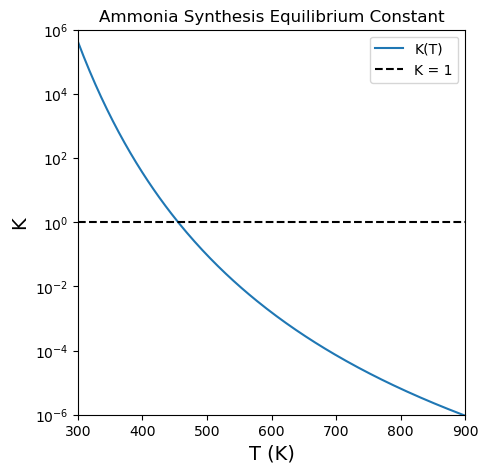

In [14]:
####################################################################
# Plotting K vs. T for ammonia synthesis                           #
####################################################################

Tvals = np.linspace(300, 900, 200)

plt.figure(figsize = (5,5))
plt.title('Ammonia Synthesis Equilibrium Constant', fontsize = 12)
plt.plot(Tvals, K(Tvals), label = 'K(T)')
plt.hlines(1, Tvals[0], Tvals[-1], linestyle = 'dashed', color = 'black', label = 'K = 1') #This is a reference line of K = 1
plt.yscale('log')
plt.ylabel('K', fontsize = 14)
plt.ylim(10**-6, 10**6)
plt.yticks(10.0**np.arange(-6, 7, 2), fontsize = 10)
plt.xlabel('T (K)', fontsize = 14)
plt.xlim(300, 900)
plt.xticks(np.arange(300, 901, 100), fontsize = 10)
plt.legend(fontsize = 10)
plt.show()

#### Wait, what was the question again?

We want to answer the following question: if we run ammonia synthesis at 873K and 1 bar starting with 1 mole of $N_2$ and 3 moles of $H_2$, what conversion of $N_2$ do we expect at chemical equilibrium? We should also determine the composition (mole fractions) of the reacting mixture at chemical equilibrium. We approach this the exact same way as we did the Ammonia Synthesis Example in [Notebook 07](https://jqbond.github.io/CEN587/Noteboooks/587-N07.html). The only difference here is that we are running the reaction at 873K, so we have to use $\Delta G^\circ$ calculated at 873K to calculate our equilibrium constant (at 1 bar and based on pure gas reference states). We did this above, and we found that, at 873K, the equilibrium constant for ammonia synthesis is $K = 1.52 \times 10^{-6}$.

#### K is also a function of thermodynamic activities!

Now that we have the equilibrium constant at 873K, 1 bar, and for pure gas reference states, we can address the composition dependence by considering:

$$K = \prod_{j = 1}^{N_S}a_j^{\nu_j}$$

Next, we need to work through the right hand side of that expression and resolve the composition dependencies within the thermodynamic activities. We can apply this equation to the specific example of ammonia synthesis to find:

$$K = \frac{{a_{N\!H_3}}^{2}}{{a_{N_2}}{a_{H_2}}^3}$$

We recall our definitions for thermodynamic activities of gases in a mixture:

$$a_j = \frac{\hat{f}_j}{f_j^\circ}$$

The numerator is the fugacity of species $j$ under reaction conditions ($T = 873K$, $P = 1 \mathrm{bar}$, $x_j = ?$). The denominator is the fugacity of species $j$ in its reference state. Our reference state for gas-phase species is a pure species at 1 bar and the reaction temperature ($T = 873K$). Our convention for calculating fugacities of gases in a mixture uses the Lewis Randall rule. With these things in mind, formally, we have:

$$a_j = \frac{y_j \phi_j P}{y_j^\circ \phi_j^\circ  P^\circ}$$

Looking at the numerator, we are operating this reactor at 1 bar, so the fugacity coefficient for species j under reaction conditions, $\phi_j$, is 1. Looking at the denominator, the reference state is a pure species, so $y_j^\circ = 1$.  Further, that pure species is at 1 bar, so $\phi_j^\circ = 1$. This gives the usual result for low pressure gases:

$$a_j = \frac{y_j P}{P^\circ}$$

Now we apply this equation to all of the species participating in the reaction.  Notice that I'm still retaining $P$ and $P^\circ$ in my solution:

$$K = \frac{\left(\frac{y_{N\!H_3}P}{P^\circ}\right)^2}{\left(\frac{y_{N_2}P}{P^\circ}\right) \left(\frac{y_{H_2}P}{P^\circ}\right)^3}$$

We see multiple pressures and reference pressures that will cancel, giving:

$$K = \frac{{y_{N\!H_3}}^2}{y_{N_2}{y_{H_2}}^3} \left(\frac{P^\circ}{P}\right)^2$$

Now we're at a point that we can't really go any further because we have 3 unknowns ($y_{N\!H_3}$, $y_{N_2}$, and $y_{H_2}$) and only 1 equation.  As before, we address this by solving for the molar quantity of each species using an extent of reaction, stoichiometric coefficients, and the starting quantity of each species.

#### Expressing Mole Fractions as functions of Extent

In general, the mole fraction for a species in the gas phase is defined as:

$$y_j = \frac{N_j}{N_{\textrm{total}}} = \frac{N_j}{\sum_j N_j}$$

We also remember that we can express the moles of each species at any point in the reaction, $N_j$ in terms of the extent of reaction(s) that are occuring in that system.  

$$N_j = N_{j,0} + \nu_j \varepsilon$$

We want to apply this equation for all species in the reactor. We can also see that the total number of moles shows up in the definition of a mole fraction, so we need to track that quantity as well. It is usually a good idea to organize all of this information in a mole table -- no matter how many equilibrium problems I solve, I still always use this simple tool to organize information. We will again relabel the compounds using N ($N_2$), H ($H_2$), and A ($NH_3$).

$$N (g) + 3H (g) \leftrightharpoons 2A (g)$$

|Species   |In        |Change           |End                     |
|:---------|:--------:|:---------------:|:----------------------:|
| $N_2$    |$N_{N0}$  |$-1\varepsilon$  |$N_{N0} - 1\varepsilon$ | 
| $H_2$    |$N_{H0}$  |$-3\varepsilon$  |$N_{H0} - 3\varepsilon$ |
| $N\!H_3$ |$N_{A0}$  |$+2\varepsilon$  |$N_{A0} + 2\varepsilon$ |
| Total    |$N_{T0}$  |$-2\varepsilon$  |$N_{T0} - 2\varepsilon$ |


We can make these substitutions into the definitions of mole fractions, ultimately finding:

$$K = \frac{\left(N_{A,0} + 2\varepsilon\right)^2 \left(N_{T,0} - 2\varepsilon\right)^2}{\left(N_{N,0} - 1\varepsilon\right) \left(N_{H,0} - 3\varepsilon\right)^3} \left(\frac{P^\circ}{P}\right)^2$$

#### Solving the problem with `opt.newton()`

Inspection of this equation reveals that we know everything except for the extent of reaction.  This means that we have written 1 Equation as a univariate function of 1 unknown. This can be solved with numerical methods.  Specifically, we will use `scipy.optimize.newton()`, which is aliased in this notebook as `opt.newton()`. This is an appropriate choice because it is designed for root finding with univariate functions. We can use a lambda function as in the Example in [Lecture 05](https://jqbond.github.io/CEN587/Lectures/587-L05.html). Remember that algebraic equation solvers use an iterative root finding approach, and we frequently need to provide an initial guess at the correct equilibrium extent. Here, we'll guess 0.01 as the  equilibrium extent of 0.01 because we know that, with an equilibrium constant of $K = 1.5\times10^{-6}$, the reaction is very unfavorable and we are expecting a very small extent of reaction converting $N_2$ and $H_2$ into $N\!H_3$.

```{important}
The only difference between this solution and the one in [Notebook 07](https://jqbond.github.io/CEN587/Notebooks/587-N07.html) is the value of the equilibrium constant. K has changed because we have changed temperature to 873K in this example. Everything else in the problem is identical to the one presented in Lecture 05. The strategies we've used to define activities, etc. is completely general, and it will apply for any condition we are interested in. We haven't plugged in numbers. The solution is left symbolic, which makes it much easier to modify to account for changes in the problem statement.  
```

In [ ]:
##################################################################################
# Solving for the equilibrium extent of reaction at 873K                         #
##################################################################################

# Define the basis; here, an extensive basis is given in the problem statement.
NN0 = 1 #mole of Nitrogen at start
NH0 = 3 #moles of Hydrogen at start
NA0 = 0 #moles of Ammonia at start
NT0 = NN0 + NH0 + NA0 #total moles at start

# Define the Reference Pressure, P0, and the system pressure, P, for this problem
P0 = 1 #bar
P  = 1 #bar

# Calculate the thermodynamic equilibrium constant at the reaction temperature
Kthermo = K(T1)

# Define the objective function to be solved using opt.newton()
obj1 = lambda ε: (NA0 + 2*ε)**2 * (NT0 - 2*ε)**2 / (NN0 - ε) / (NH0 - 3*ε)**3 * P0**2 / P**2 - Kthermo

# Find the root of the objective function using opt.newton()
ans, info = opt.newton(obj1, 0.01, full_output = True)

# Print the answer using a formatted f-string
print(f'At T = {T1:0.0f}K, the extent of reaction at equilibrium is {ans:0.2E} moles')

At T = 873K, the extent of reaction at equilibrium is 7.99E-04 moles


#### Using the equilibrium extent to calculate composition and conversion


Now that we know the reaction extent at equilibrium, it is easy enough to calculate the fractional conversion of $N_2$ and the composition of the mixture:

In [16]:
########################################################################################################################
# This cell uses the solution for extent at equilibrium to compute the corresponding system composition at equilibrium #
########################################################################################################################

yN = (NN0 - ans)/(NT0 - 2*ans)
yH = (NH0 - 3*ans)/(NT0 - 2*ans)
yA = (NA0 + 2*ans)/(NT0 - 2*ans)
XN = ans/NN0

print(f'At T = {T1:0.0f}K, equilibrium mole fractions for N2, H2, and NH3 are {yN:0.3f}, {yH:0.3f}, {yA:0.3E}')
print(f'At T = {T1:0.0f}K, the equilibrium fractional conversion of N2 is {XN:0.2E}')

At T = 873K, equilibrium mole fractions for N2, H2, and NH3 are 0.250, 0.750, 3.994E-04
At T = 873K, the equilibrium fractional conversion of N2 is 7.99E-04


#### Why not make a general function so we aren't stuck doing manipulations by hand

Although there is nothing wrong with the solution above, I *prefer* to address the problem as below, which is to embed all of the calculations of numbers of moles, mole fractions, and thermodynamic activities into my objective function--see `obj2(ε)` below.  This makes it easy for me to look at the equations and understand exactly what they mean, which helps me to identify mistakes in my code.

```{tip}
Compare `obj2(ε)` to the function `obj1(ε)` above.  Functionally, the two accomplish exactly the same thing, but, to me, `obj2(ε)` is far easer to understand in terms of physical significance of each term. The reason for this is that it is all symbolic and left in the form of definitions and equations that are physically intuitive to us.  Python doesn't make mistakes in performing math operations, whereas we frequently make mistakes with algebraic manipulations.  Let's offload the tedious part to Python, why don't we?
```

In [ ]:
####################################################################################################################################
# This is functionally equivalent to the above solution, but it offloads substitutions to Python instead of our doing them by hand #
####################################################################################################################################

# Build a univariate objective function called obj2

def obj2(ε):
    T1  = 873 #K
    P   = 1.0 #bar
    P0  = 1.0 #bar
    NN0 = 1.0 #moles
    NH0 = 3.0 #moles
    NA0 = 0.0 #moles
    
    NN  = NN0 - ε
    NH  = NH0 - 3*ε
    NA  = NA0 + 2*ε
    NT  = NN + NH + NA
    
    yN  = NN/NT
    yH  = NH/NT
    yA  = NA/NT
    
    aN  = yN*P/P0
    aH  = yH*P/P0
    aA  = yA*P/P0
    
    KTHERMO = K(T1)
    KCOMP = aA**2/aN/aH**3
       
    return KCOMP - KTHERMO  #We want to find the value of extent where KCOMP - Kthermo = 0

ans, info = opt.newton(obj2, 0.01, full_output = True) #This solves for the equilibrium extent

print(info, '\n') #Let's make sure it converged...

#Solve for conversion and mole fractions.
NN = NN0 - ans
NH = NH0 - 3*ans
NA = NA0 + 2*ans
NT = NN + NH + NA
XN = (NN0 - NN)/NN0
yN = NN/NT
yH = NH/NT
yA = NA/NT

print(f'At T = {T1:0.0f}K, the equilibrium conversion of N2 is {XN:0.2E}, yN is {yN:0.3f}, yH is {yH:0.3f}, and yA is {yA:0.2E}')

      converged: True
           flag: converged
 function_calls: 11
     iterations: 10
           root: 0.0007985377054623165
         method: secant 

At T = 873K, the equilibrium conversion of N2 is 7.99E-04, yN is 0.250, yH is 0.750, and yA is 3.99E-04


### What can we do to improve the equilibrium conversion?

In cases where a gas-phase reaction causes a decrease in the total number of moles, one can create a more favorable equilibrium position by increasing reaction pressure. This is true in the case of ammonia synthesis:

$$N_2 + 3H_2 \leftrightharpoons 2N\!H_3$$

Recalling Le Chatelier's principle, an increase in pressure favors the side with fewer moles, so this will drive ammonia synthesis to the right, form more products (ammonia), and allow us to achieve higher equilibrium conversion of $N_2$ and a higher equilibrium yield of ammonia.  Let's see how that plays out.

### Adapting the Solution for High Pressure

We will still run the reaction at 873K and starting with 1 mole of $N_2$ and 3 moles of $H_2$; howver, we will increase the reactor pressure to an as yet unspecified higher pressure, P.  For the moment, I will say that, no matter how high we make the pressure, the gases still behave as ideal gases.  This is technically incorrect, but it avoids our having to calculate fugacity coefficients, which we'll save for [Notebook 10](https://jqbond.github.io/CEN587/Notebooks/587-N10.html).

Reviewing, to determine the composition of the reactor at equilibrium, we need to solve:

$$\exp\left(\frac{-\Delta G^\circ}{RT}\right) = K = \prod_{j = 1}^{N_S}a_j^{\nu_j}$$

We'll do that in steps.

### Finding the Equilibrium constant, K


The value $\Delta G^\circ$ that appears in the equation above is the standard state Gibbs free energy change for reaction.  

```{tip}
For equilibrium problems, we always specify this at the reaction temperature (here, $T = 873K$), at 1 bar pressure ($P^\circ = 1 \mathrm{bar}$), and for pure gas species (since this is a gas phase reaction).
```

As far as I can tell, we already did this above.  We are increasing pressure, but that does not change the value of our thermodynamic equilibrium constant.  It only depends on temperature, and we are still operating at 873K!!!

So, we already know the answer to this part:

$$K = 1.52\times10^{-6}$$

### Finding the composition dependencies using activities

Now we approach the right hand side of the equilibrium equation:

$$K = \prod_{j = 1}^{N_S}a_j^{\nu_j}$$

Absolutely nothing has changed about the way we handle this! We know that this expands to:

$$K = \frac{{a_{N\!H_3}}^{2}}{{a_{N_2}}{a_{H_2}}^3}$$

We still define thermodynamic activities of gases in a mixture:

$$a_j = \frac{\hat{f}_j}{f_j^\circ}$$

The numerator is the fugacity of species $j$ under reaction conditions $(T = 873K, P = ? \ \textrm{bar}, x_j = ?)$. The denominator is the fugacity of species $j$ in its reference state. Our reference state for gas-phase species is a pure species at 1 bar and the reaction temperature ($T = 873K$). Our convention for calculating fugacities of gases in a mixture uses the Lewis Randall rule. With these things in mind, formally, we have:

$$a_j = \frac{y_j \phi_j P}{y_j^\circ \phi_j^\circ  P^\circ}$$

Looking at the numerator, we are operating this reactor at some unknown high pressure "P" bar, so the fugacity coefficient for species j under reaction conditions, $\phi_j$ is probably not actually 1.  That said, I am explicitly specifying these gases presently behave as ideal gases at all pressures, so we will make the normally bad assumption that $\phi_j$ is 1 just because I've written the problem that way. Looking at the denominator, the reference state is a pure species, so $y_j^\circ = 1$.  Further, that pure species is at 1 bar, so $\phi_j^\circ = 1$. Because we assumed ideal gas behavior, we get the result for low pressure gases:

$$a_j = \frac{y_j P}{P^\circ}$$

Now we substitute the activity definition into the equilibrium expression as usual:

$$K = \frac{\left(\frac{y_{N\!H_3}P}{P^\circ}\right)^2}{\left(\frac{y_{N_2}P}{P^\circ}\right) \left(\frac{y_{H_2}P}{P^\circ}\right)^3}$$

We see multiple pressures and reference pressures that will cancel, giving:

$$K = \frac{{y_{N\!H_3}}^2}{y_{N_2}{y_{H_2}}^3} \left(\frac{P^\circ}{P}\right)^2$$

Comparision with the last two problems shows that nothing is different about the approach. All we are doing is changing the pressure, which appears on the right hand side of the equation.  As we change the pressure, it requires the mole fractions of species to change since the equilibrium constant is fixed at a value of $K = 1.52\times10^{-6}$ once we set temperature to 873K.We can solve this equation as usual with any root finding algorithm. We will simply copy the code for `obj2(ε)` from a few cells back, change the objective function name to `obj3(ε)`, adjust the reactor pressure as needed, and then solve using `opt.newton()` as before. Note here that I've embedded all of the substitutions inside of a function instead of doing them myself on a scratch paper.  I generally find this is cleaner and more human readable.

```{tip}
Notice: The approach is completely general, and it is simple to adapt this solution to different temperatures and pressures. This is one serious advantage to writing a script to perform the calcualtions rather than trying to substitute numbers by hand. As we change temperature, the effect is captured in $K(T)$, calculates a new equilibrium constant once temperature is specified.  As we change pressure, the effect appears in my definition of thermodyanmic activities.  So we can easily change either $T$ or $P$ at will and then re-solve the objective function at any new condition using `opt.newton()`.
```

In [ ]:
####################################################################################################################################
# This objective function will be where we adjust values of T and/or P to see how it impacts the ammonia equilibrium position      #
####################################################################################################################################

# Build a univariate objective function called obj3; here, we intend that T and/or P can be redefined as needed to adapt to new reaction conditions.
# In class, we typically solve this equation at 1 bar, 10 bar, 100 bar, and 1000 bar, noting that each will require a good initial guess.

def obj3(ε):

    #Specifications for this problem
    T1  = 873 #K
    P   = 1.0 #bar
    P0  = 1.0 #bar
    NN0 = 1.0 #moles
    NH0 = 3.0 #moles
    NA0 = 0.0 #moles
   
    NN  = NN0 - ε
    NH  = NH0 - 3*ε
    NA  = NA0 + 2*ε
    NT  = NN + NH + NA
    
    yN  = NN/NT
    yH  = NH/NT
    yA  = NA/NT
    
    aN  = yN*P/P0
    aH  = yH*P/P0
    aA  = yA*P/P0
    
    KCOMP = aA**2/aN/aH**3
    KTHERMO = K(T1)       

    return KCOMP - KTHERMO  #We want to find the value of extent where KCOMP - Kthermo = 0

ans, info = opt.newton(obj3, 0.5, full_output = True) #This solves for the equilibrium extent

print(info, '\n') #Let's make sure it converged...

#Solve for conversion and mole fractions.
NN = NN0 - ans
NH = NH0 - 3*ans
NA = NA0 + 2*ans
NT = NN + NH + NA
XN = (NN0 - NN)/NN0
yN = NN/NT
yH = NH/NT
yA = NA/NT

print(f'At T = {T1:0.0f}K and P = {P:0.0f} bar, equilibrium conversion of N2 is {round(XN,4)}, yA is {round(yN, 4)}, yB is {round(yH, 4)}, and yC is {round(yA, 4)}')

      converged: True
           flag: converged
 function_calls: 23
     iterations: 22
           root: 0.0007985377072011384
         method: secant 

At T = 873K and P = 1 bar, equilibrium conversion of N2 is 0.0008, yA is 0.2499, yB is 0.7497, and yC is 0.0004


### This really doesn't seem industrially feasible

Unfortunately, the equilibrium conversion at $T = 873K$ and $P = 10 \mathrm{bar}$ is still below 1%. We'll have to do better than that to have an economically viable process. The challenge is that, if you were to run gas-phase ammonia synthesis at 873K to get adequate reaction rate, you'd need to run that process above 1000 bar to achieve anything above about 30% conversion of $N_2$. In general, it would be very expensive to run a process at 1000 bar, and it is unlikely one could operate something at the scale of an ammonia synthesis plant at 1000 bar. This is where the Haber-Bosch innovation becomes critically important. A key innovation is the in that process is the addition of a catalyst to ammonia synthesis, which we discuss subsequently.  

Prior to doing that, it is important to recognize that a catalyst does not change the overall thermodynamics of a reaction.  So whether or not there is a catalyst, ammonia synthesis is horribly unfavorable at 873K.  A catalyst would just allow the reaction to run at a faster rate and reach that horribly unfavorable equilbirium in a shorter time than it would without a catalyst.  See figure below for a conceptual illustration of a reaction, $A \leftrightarrow B$ with $K = 2$:

Do not worry about the equations and functions in the next cell -- we haven't covered this material yet, and we won't get to it until course sections on material balances. For the moment, all you need to know is that these are expressions that describe the concentrations of A and B in a batch reactor an $A \leftrightarrow B$ reaction with $K = 2$.

```{warning}
A catalyst does not change the overall thermodynamic favorability of a reaction (equilibrium); it only changes how fast that reaction reaches equilibrium.
```

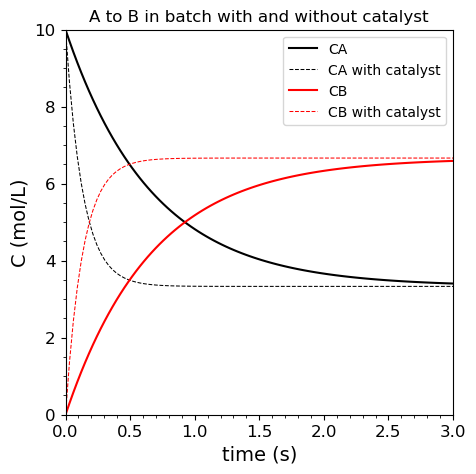

In [21]:
###########################################################################################################################################
# This cell illustrates reaction progress for an equilibrium limited reaction with and without a catalyst to accelerate reaction rate     #
# You can see that the catalyst doesn't change how far the reaction can go at a given temperature, it only changes how fast it gets there #
###########################################################################################################################################

CA0     = 10 #moles
CB0     = 0  #moles
k1f     = 1  #1/sec
K1      = 2  
k1r     = k1f/K1 #1/sec
tmax    = 3 #seconds

k1cf    = 5
k1cr    = k1cf/K1

CAnocat = lambda t: CA0*np.exp(-(k1f + k1r)*t) + k1r/(k1f + k1r)*(CA0 + CB0)*(1 - np.exp(-(k1f + k1r)*t))
CBnocat = lambda t: CB0*np.exp(-(k1f + k1r)*t) + k1f/(k1f + k1r)*(CA0 + CB0)*(1 - np.exp(-(k1f + k1r)*t))
CAcat   = lambda t: CA0*np.exp(-(k1cf + k1cr)*t) + k1cr/(k1cf + k1cr)*(CA0 + CB0)*(1 - np.exp(-(k1cf + k1cr)*t))
CBcat   = lambda t: CB0*np.exp(-(k1cf + k1cr)*t) + k1cf/(k1cf + k1cr)*(CA0 + CB0)*(1 - np.exp(-(k1cf + k1cr)*t))

tspan   = np.linspace(0, tmax, 100)

plt.figure(figsize = (5,5))
plt.plot(tspan, CAnocat(tspan), label = 'CA', color = 'black', linestyle = 'solid')
plt.plot(tspan, CAcat(tspan), label = 'CA with catalyst', color = 'black', linestyle = 'dashed', linewidth = 0.75)
plt.plot(tspan, CBnocat(tspan), label = 'CB', color = 'red', linestyle = 'solid')
plt.plot(tspan, CBcat(tspan), label = 'CB with catalyst', color = 'red', linestyle = 'dashed', linewidth = 0.75)
plt.xlim(tspan[0], tspan[-1])
plt.xticks(fontsize = 12)
plt.xlabel('time (s)', fontsize = 14)
plt.ylim(0, CA0)
plt.yticks(fontsize = 12)
plt.ylabel('C (mol/L)', fontsize = 14)
plt.minorticks_on()
plt.legend(fontsize = 10, loc = 'upper right')
plt.title('A to B in batch with and without catalyst')
plt.show()

### Why is the catalyst so important in ammonia synthesis then?

The reason the addition of a catalyst benefits this process so much is that it allows us to achieve a faster rate of reaction (relative to the non-catalytic system) at a given temperature.  Another way to think of this is that the catalytic system will not require as a high a temperature to achieve the same rate as the non-catalytic system.  So, for example, if kinetics force us to operate ammonia synthesis at 873K without a catalyst, perhaps we can achieve the same rate at 673K with a catalyst.  Since ammonia synthesis is exothermic, this reduction in operating temperature is extremely beneficial toward improving the equilibrium limitation.  We illustrate this effect in the cell below, which is just code copied from above, but we can adjust temperature and pressure to see how it impacts chemical equilibrium.

Ultimately, we'll find that at $T = 673K$ and $P = 200 \mathrm{bar}$, it is possible to achieve $X_{N_2} \approx 0.5$. 

```{warning}
Caveat: we have assumed ideal gas behavior in this solution, which is incorrect at 200 bar. To obtain a better estimate of nitrogen conversion and ammonia yield at $T = 673K$ and $P = 200 \mathrm{bar}$, we would need to calculate fugacity coefficients at 200 bar. This is the topic of [Notebook 10](https://jqbond.github.io/CEN587/Notebooks/587-N10.html).
```

In [24]:
####################################################################################################################################
# This objective function will be where we adjust values of T and/or P to see how it impacts the ammonia equilibrium position      #
####################################################################################################################################

T2 = 673 #K
P2 = 200 #bar

def obj4(ε):

    #Specifications for this problem
    P   = P2 #bar
    P0  = 1.0 #bar
    NN0 = 1.0 #moles
    NH0 = 3.0 #moles
    NA0 = 0.0 #moles
    
    NN  = NN0 - ε
    NH  = NH0 - 3*ε
    NA  = NA0 + 2*ε
    NT  = NN + NH + NA
    
    yN  = NN/NT
    yH  = NH/NT
    yA  = NA/NT
    
    aN  = yN*P/P0
    aH  = yH*P/P0
    aA  = yA*P/P0
    
    KCOMP = aA**2/aN/aH**3
    KTHERMO = K(T2)
       
    return KCOMP - KTHERMO  #We want to find the value of extent where KCOMP - KTHERMO = 0

ans, info = opt.newton(obj4, 0.5, full_output = True) #This solves for the equilibrium extent

print(info, '\n') #Let's make sure it converged...

#Solve for conversion and mole fractions.
NN = NN0 - ans
NH = NH0 - 3*ans
NA = NA0 + 2*ans
NT = NN + NH + NA
XN = (NN0 - NN)/NN0
yN = NN/NT
yH = NH/NT
yA = NA/NT

print(f'At T = {T2:0.0f}K and P = {P2:0.0f} bar, the equilibrium conversion of N2 is {XN:0.3f}, yA is {yN:0.3f}, yB is {yH:0.3f}, and yC is {yA:0.3f}')

      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 0.5119797716314257
         method: secant 

At T = 673K and P = 200 bar, the equilibrium conversion of N2 is 0.512, yA is 0.164, yB is 0.492, and yC is 0.344
